In [0]:
! pip install sns plotly==4.5.0

Get something that's re-usable as we update the table.

In [0]:
import re
input_str = """
because of.prep (61), because.c (109), bring about.v, bring on.v, bring.v (3), causative.a, cause.n (5), cause.v\\ (17), consequence.n (1), consequent.a, consequential.a, dictate.v, due to.prep (11), for.c, force.v (17), give rise.v, induce.v, lead (to).v\\ (12), leave.v (19), legacy.n (1), make.v (66), mean.v (19), motivate.v, precipitate.v, put.v (41), raise.v, reason.n (16), render.v,\\ responsible.a (11), result (in).v (15), result.n (11), resultant.a, resulting.a (2), see.v, send.v, since.c (4), so.c (31), sway.v, wreak.v
""".replace("\\","")
match_regex = re.compile("([\s.\w]+)\s+\((\d+)\)")
def matcher(s):
  m = match_regex.match(s)
  return bool(m)
def extractor(s):
  m = match_regex.match(s)
  return (m.groups(0), m.groups(1))
input_list = map(extractor, filter(matcher, map(str.strip, input_str.split(","))))
input_list.__next__()

(('because of.prep', '61'), ('because of.prep', '61'))

In [0]:
import operator
def get_tuples_from_input_string(s):
  return list(map(operator.itemgetter(0), map(extractor, filter(matcher, map(str.strip, s.replace("\\", "").split(","))))))
get_tuples_from_input_string(input_str)

[('because of.prep', '61'),
 ('because.c', '109'),
 ('bring.v', '3'),
 ('cause.n', '5'),
 ('cause.v', '17'),
 ('consequence.n', '1'),
 ('due to.prep', '11'),
 ('force.v', '17'),
 ('leave.v', '19'),
 ('legacy.n', '1'),
 ('make.v', '66'),
 ('mean.v', '19'),
 ('put.v', '41'),
 ('reason.n', '16'),
 ('responsible.a', '11'),
 ('result.n', '11'),
 ('resulting.a', '2'),
 ('since.c', '4'),
 ('so.c', '31')]

Copy-paste the table LaTeX code here.


In [0]:
data = {
    "STATEMENT": """
      acknowledge.v (3), acknowledgment.n, add.v, address.v, admission.n, allegation.n (6), allege.v (4), allow.v,\\ announce.v (19), announcement.n (4), assert.v (4), assertion.n, attest.v (1), aver.v, avow.v, avowal.n, be like.v, caution.n, caution.v,\\ challenge.v, claim.n (18), claim.v (11), comment.n (5), comment.v (3), concession.n, confirm.v (3), conjecture.n, conjecture.v, \\contend.v, contention.n, declaration.n, declare.v (5), denial.n, describe.v (7), detail.v, exclaim.v, exclamation.n, explain.v (2), gloat.v,\\ explanation.n, hazard.v, insist.v, insistence.n (1), maintain.v, mention.n, mention.v (9), message.n, note.v (2), observe.v (1), pout.v,\\ preach.v, proclaim.v, proclamation.n, profess.v, promulgation.n, pronounce.v, pronouncement.n, proposal.n (32), propose.v (29),\\ proposition.n (7), reaffirm.v (1), recount.v, refute.v (1), reiterate.v (1), relate.v, remark.n, remark.v, report.n (28), report.v (21),\\ say.v (350), smirk.v, speak.v (16), state.v (4), statement.n (11), suggest.v (7), talk.v (21), tell.v (44), venture.v, write.v (18)  
    """,
    "CAUSATION": """
      because of.prep (61), because.c (109), bring about.v, bring on.v, bring.v (3), causative.a, cause.n (5), cause.v \\(17), consequence.n (1), consequent.a, consequential.a, dictate.v, due to.prep (11), for.c, force.v (17), give rise.v, induce.v, lead (to).v \\(12), leave.v (19), legacy.n (1), make.v (66), mean.v (19), motivate.v, precipitate.v, put.v (41), raise.v, reason.n (16), render.v,\\ responsible.a (11), result (in).v (15), result.n (11), resultant.a, resulting.a (2), see.v, send.v, since.c (4), so.c (31), sway.v, wreak.v  
    """,
    "TAKING SIDES":"""
      against.prep (21), back.v (6), backing.n, believe in.v (7), endorse.v (12), for.prep (8), in favor.prep (5),\\ opponent.n (15), oppose.v (19), opposition [act].n (2), opposition [entity].n, part.n, pro.adv (8), side.n (6), side.v (1), support.v (81),\\ supporter.n (15), supportive.a   
    """,
    "CAPABILITY": """
      ability.n (6), able.a (24), can.v (153), capability.n, capable.a (4), capacity.n (3), inability.n, incapable.a,\\ incapacity.n, potential.a (3), potential.n (1), power.n (10), powerful.a(4), powerless.a, powerlessness.n, unable.a (2)   
    """,
    "CREATING":"""
      assemble.v, create.v (62), form.v (7), formation.n, generate.v (7), issuance.n (1), issue.v (11), make.v, \\produce.v (9), production.n (9), yield.v (2)
    """,
    "CONDITIONAL OCCURRENCE": """
        as long as.scon (3), assuming.scon, if.scon (154), in case.scon (1), in the event.prep (1), \\provided.scon, supposing.scon, what if.scon  
    """,
    "OCCUPY RANK": """
  rank.v (12), stand.v, top.a (22) 
    """,
    "VOTE":"""
      vote.v (105), (a/the) deciding vote.n (5)
    """,
    "UNIQUENESS OF TRAIT":"""
      the only.a (34)
    """,
    "RECURRING ACTION":"""
      every.prep (25)
    """,
    "OCCUPY RANK VIA ORDINAL NUMBERS":"""
     No. 1.a (10) 
    """,
    "CAUSE CHANGE OF POSITION ON A SCALE":"""
       add.v (22), crank.v, curtail.v, cut.n (81), cut.v (61), decrease.v,\\ development.n (10), diminish.v, double.v (10), drop.v, enhance.v, growth.n, increase.v (21), knock down.v, lift.v, lower.v (6), move.v,\\ promote.v, push.n, push.v (6), raise.v, reduce.v (45), reduction.n (14), slash.v (9), step up.v, swell.v   
    """,
    "RATIO":"""
       percent of. (206), out of. (13) 
    """,
    "COMPARING TWO ENTITIES":"""
      than.sc (124)
    """,
    "COMPARING AT TWO DIFFERENT POINTS IN TIME":"""
      than.sc (29) 
    """,
    "CORRELATION":"""
      every time.adv (1), whenever.c
    """,
    "TAKING SIDES CONSISTENCY":"""
      change.v (3), flip-flop.v (2), shift.v (1) 
    """,
    "RECURRENT ACTION IN FREQUENCY":"""
       time.n (36) 
    """,
    "CORRELATION":"""
     every time.adv (1), whenever.c
    """,
    "OCCUPY RANK VIA SUPERLATIVES":"""
      biggest.a (27), fastest.a (4), fewest.a (4), highest.a (61), largest.a (50), longest.a (4),\\ most.adv (53), oldest.a(2), richest.a (2), safest.a (7), smallest.a (1),   worst.a (17)
     """
}

Convert to DF

In [0]:
import pandas as pd
d = {"Frame Instance":[], "Lexical Unit":[], "Count":[]}
for k, v in data.items():
  tuples = get_tuples_from_input_string(v)
  for lexical_unit, count_str in tuples:
    count = int(count_str)
    d["Frame Instance"].append(k)
    d["Lexical Unit"].append(lexical_unit)
    d["Count"].append(count)
df = pd.DataFrame(data=d)
df.iloc[0:2, :]

Frame Instance   Lexical Unit  Count
0      STATEMENT  acknowledge.v      3
1      STATEMENT   allegation.n      6

In [0]:
"say.v" in sorted(df["Lexical Unit"].unique())

True

Plot

In [0]:
import plotly.express as px
fig = px.pie(df, values='Count', names='Lexical Unit', title='Lexical Unit Distribution', hole=0.3)
fig.show()

The categories are too close together, let's group everything below 1.55% together (1.55% has a count of 35).

In [0]:
import copy
df_og = copy.deepcopy(df)
sum(df["Count"] < 35)

104

In [0]:
df["Original Lexical Unit"] = df["Lexical Unit"]

In [0]:
df.loc[df["Count"] < 35, "Lexical Unit"] = "Other"

In [0]:
fig = px.pie(df, values='Count', names='Lexical Unit', title='Lexical Unit Distribution', hole=0.3)
fig.show()

Let's try a different color pallette...

check this out! ['#fffcfc', '#f2d3d3', '#cfddf2', '#eac9bb', '#b8bfdf']


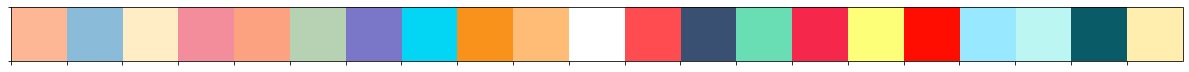

In [0]:
import re
hexstring = """ 	 	#fffcfc 	(255,252,252)
	#f2d3d3 	(242,211,211)
	#cfddf2 	(207,221,242)
	#eac9bb 	(234,201,187)
	#b8bfdf 	(184,191,223)
"""
pat = re.compile("\s*(#[0-9a-f]+)[\s\S\(\),\d]*")
def get_colors(hexstring):
  lines = list(map(str.strip, hexstring.split("\n")))
  hex_tokens = list(map(lambda l: pat.match(l).groups()[0], filter(lambda l: pat.match(l), lines)))
  return hex_tokens
print(f"check this out! {get_colors(hexstring)}")
color_pallettes = {
    "A E S T H E T I Clly": ["#bae9ff", "#eea4ba", "#e8c7ff", "#ecdd87", "#9dee9a"], #https://www.color-hex.com/color-palette/88814
    "Winter Sunrises": ["#eaeaea", "#8abcd9", "#3a5072", "#ff4c50", "#ff98b9"], # https://www.color-hex.com/color-palette/88811
    "soft pastel sunset": ["#ff7575", "#ff8d79", "#ffb870", "#ffd861", "#ffed83"], # https://www.color-hex.com/color-palette/88755
    "happy wheelz":["#fff0f0", "#ffc0cb", "#c0eaff", "#85a5ea", "#feff98"], #https://www.color-hex.com/color-palette/88725
    "Bubblegum Splash":["#f99fee", "#ffdf6b", "#f9921b", "#69deb5", "#d7478b"] ,#https://www.color-hex.com/color-palette/88675
    "Hortensius": ["#fe6594", "#7b77c8", "#4cc3f8", "#feb794", "#ffdb5c"] ,#https://www.color-hex.com/color-palette/88691
    "Anime Pastels (Bright Pink Base)": ["#ffc0d3", "#fed7e9", "#fd9bca", "#90335d", "#9bfdce"], #https://www.color-hex.com/color-palette/88552
    "Bright Energy" : ["#b7d2b2", "#8aa980", "#eeb4b4", "#e31131", "#f6583c"], #https://www.color-hex.com/color-palette/88406
    "bright pride" : ["#ffb9b9", "#ffdbb7", "#eaffb0", "#b4ffc8", "#75eeff"], #https://www.color-hex.com/color-palette/88288
    "brightly pastel": ["#fd8c8c", "#e7f695", "#a5f69d", "#90e1f9", "#d99efb"], #https://www.color-hex.com/color-palette/78169
    "dark and bright": ["#095b67", "#f8fda6", "#e74c54", "#d82f5a", "#f2dbbf"], #https://www.color-hex.com/color-palette/78084
    "Bright Chords": ["#f5284c", "#ff6a4e", "#fca280", "#f4f186", "#feff78"], #https://www.color-hex.com/color-palette/77478
    "Brights 1 CL": ["#aedfdb", "#f4d94e", "#f38d9b", "#21b7a9", "#99d45d"], #https://www.color-hex.com/color-palette/75803,
    "if i promised to you": ["#ffafc2", "#ffbfc2", "#ffcfc2", "#ffdfc2", "#ffefc2"], #https://www.color-hex.com/color-palette/35843
    "Let It Be": ["#ffeec5", "#ffdec5", "#ffcec5", "#ffbec5", "#ffaec5"], #https://www.color-hex.com/color-palette/35837
    "do I ever think these through": ["#a5e500", "#c3ff28", "#a3f113", "#77ce19", "#88ce06"], #https://www.color-hex.com/color-palette/35869
    "Sunbleached": ["#d4b7b7", "#e2b7de", "#eeced8", "#f1e5d2", "#daf2e6"], #https://www.color-hex.com/color-palette/35797

    "Primley Blue": ["#658b8b", "#86c3c3", "#b0dfdf", "#cbecec", "#e2f9f9"], #https://www.color-hex.com/color-palette/35785
    "rococo": get_colors("""#fffcfc 	(255,252,252)
	#f2d3d3 	(242,211,211)
	#cfddf2 	(207,221,242)
	#eac9bb 	(234,201,187)
	#b8bfdf 	(184,191,223)"""), #https://www.color-hex.com/color-palette/35730
    "Sound sleep": get_colors(""" 	#a74c59 	(167,76,89)
	#1d3541 	(29,53,65)
	#8ba2a8 	(139,162,168)
	#d8c18d 	(216,193,141)
	#be9b7a 	(190,155,122)"""), #https://www.color-hex.com/color-palette/35717
    "Nanner Puddin": get_colors("""#eee9bc 	(238,233,188)
	#f4dc92 	(244,220,146)
	#e7d174 	(231,209,116)
	#d6b566 	(214,181,102)
	#d0cb68 	(208,203,104)"""), #https://www.color-hex.com/color-palette/35675
    "Patchwork": get_colors(""" 	#ff6f69 	(255,111,105)
	#ffcc5c 	(255,204,92)
	#ffeead 	(255,238,173)
	#ffffff 	(255,255,255)
	#96ceb4 	(150,206,180)"""), #https://www.color-hex.com/color-palette/88345
    "--parrot--": get_colors(""" 	#ff4c4b 	(255,76,75)
	#ffd764 	(255,215,100)
	#009bb3 	(0,155,179)
	#e6e6ea 	(230,230,234)
	#f4f4f5 	(244,244,245)"""),#https://www.color-hex.com/color-palette/88274
    "Community Kitchen": get_colors(""" 	#f7f6e3 	(247,246,227)
	#f8fd93 	(248,253,147)
	#dbff85 	(219,255,133)
	#afec7c 	(175,236,124)
	#8ecc7e 	(142,204,126)"""), #https://www.color-hex.com/color-palette/88124
    "Magic Sky": get_colors("""#b8ffb9 	(184,255,185)
	#93eac4 	(147,234,196)
	#75dbd8 	(117,219,216)
	#6dc5df 	(109,197,223)
	#7eaee3 	(126,174,227)"""), #https://www.color-hex.com/color-palette/88065
  "Infinite Inferno": get_colors(""" 	#fbc316 	(251,195,22)
	#ff9a00 	(255,154,0)
	#ff7400 	(255,116,0)
	#ff5a00 	(255,90,0)
	#ff0d00 	(255,13,0)"""), #https://www.color-hex.com/color-palette/88079
  "A Splash of Brine": get_colors(""" 	#99d6d2 	(153,214,210)
	#65b4b2 	(101,180,178)
	#2d7c7a 	(45,124,122)
	#175456 	(23,84,86)
	#153e3b 	(21,62,59)"""), #https://www.color-hex.com/color-palette/87883
  "Thumbelina": get_colors(""" 	#ffd3d3 	(255,211,211)
	#cc1a7c 	(204,26,124)
	#0fa8e3 	(15,168,227)
	#f400ea 	(244,0,234)
	#02d6f4 	(2,214,244)"""), ##https://www.color-hex.com/color-palette/88003
  "Highlight mild": get_colors(""" 	#fdb9c9 	(253,185,201)
	#ffdcbe 	(255,220,190)
	#f6f3b5 	(246,243,181)
	#bbf6f3 	(187,246,243)
	#a7e0f4 	(167,224,244)"""), #
  "Colors for Discord": get_colors("""#ffaa5c 	(255,170,92)
	#90fde4 	(144,253,228)
	#82cdfb 	(130,205,251)
	#e6aeff 	(230,174,255)
	#ecffa5 	(236,255,165)"""), #https://www.color-hex.com/color-palette/87812
  "rainbow waterfall": get_colors(""" 	#ff729d 	(255,114,157)
	#ffbc77 	(255,188,119)
	#c8ff93 	(200,255,147)
	#a4ffcf 	(164,255,207)
	#98e8ff 	(152,232,255)"""), #https://www.color-hex.com/color-palette/87608
  "sala fresh chic": get_colors(""" 	#1a9cbd 	(26,156,189)
	#f7cb4e 	(247,203,78)
	#95c6e2 	(149,198,226)
	#bbbbbb 	(187,187,187)
	#c0703e 	(192,112,62)""") #https://www.color-hex.com/color-palette/87560
}
color_choices = [color for pallette in color_pallettes.values() for color in pallette]
import random
num_unique_values = len(df["Lexical Unit"].value_counts().to_dict())
def get_color_pallette(SEED=42, N=num_unique_values):
  random.seed(SEED)
  pallette = random.sample(color_choices, N)
  return pallette
import seaborn as sns
sns.palplot(get_color_pallette())

Ok, now let's re-try that donut chart with the custom generated pallette.

In [0]:
discrete_column = 'Lexical Unit'
pallette = get_color_pallette()
fig = px.pie(df, values='Count', names=discrete_column, color=discrete_column, color_discrete_sequence=pallette, title='Lexical Unit Distribution', hole=0.3)
fig.show()

That looks easier to read. Let's do the same for the Frame Instances.

In [0]:
df_fcounts = df.groupby(by="Frame Instance").agg([sum])["Count"].reset_index()

In [0]:
fig = px.pie(df_fcounts, values='sum', names='Frame Instance', title='Frame Instance Distribution', hole=0.3)
fig.show()

Lets group things with a count of 5 or below together for readability.

In [0]:
df_fcounts = df_fcounts[df_fcounts["sum"] > 5]

In [0]:
fig = px.pie(df_fcounts, values='sum', names='Frame Instance', title='Frame Instance Distribution', hole=0.3)
fig.show()



```
# This is formatted as code
```

That looks better. Let's see how a Sankey diagram looks.

In [0]:
d = {}
for row in df.to_numpy():
  frame_instance, lu, count = row[0], row[1], row[2]
  if frame_instance in d:
    if lu in d[frame_instance]:
      d[frame_instance][lu] = d[frame_instance][lu] + count
    else:
      d[frame_instance][lu] = count
    d[frame_instance] 
  else:
    d[frame_instance] = {lu:count}
d

{'CAPABILITY': {'Other': 53, 'can.v': 153},
 'CAUSATION': {'Other': 168,
  'because of.prep': 61,
  'because.c': 109,
  'make.v': 66,
  'put.v': 41},
 'CAUSE CHANGE OF POSITION ON A SCALE': {'Other': 98,
  'cut.n': 81,
  'cut.v': 61,
  'reduce.v': 45},
 'COMPARING AT TWO DIFFERENT POINTS IN TIME': {'Other': 29},
 'COMPARING TWO ENTITIES': {'than.sc': 124},
 'CONDITIONAL OCCURRENCE': {'Other': 5, 'if.scon': 154},
 'CORRELATION': {'Other': 1},
 'CREATING': {'Other': 46, 'create.v': 62},
 'OCCUPY RANK': {'Other': 34},
 'OCCUPY RANK VIA ORDINAL NUMBERS': {'Other': 10},
 'OCCUPY RANK VIA SUPERLATIVES': {'Other': 66,
  'highest.a': 61,
  'largest.a': 50,
  'most.adv': 53},
 'RATIO': {'Other': 13, 'percent of.': 206},
 'RECURRENT ACTION IN FREQUENCY': {'time.n': 36},
 'RECURRING ACTION': {'Other': 25},
 'STATEMENT': {'Other': 305, 'say.v': 350, 'tell.v': 44},
 'TAKING SIDES': {'Other': 123, 'support.v': 81},
 'TAKING SIDES CONSISTENCY': {'Other': 4},
 'UNIQUENESS OF TRAIT': {'Other': 34},
 'V

In [0]:
import functools

nodes = list(d.keys())
lexical_units = functools.reduce(lambda l1, l2: [*l1, *l2], [list(v.keys()) for v in d.values()])
nodes = list(set([*nodes, *lexical_units]))
pallette = get_color_pallette(N=len(nodes), SEED=666)
def convert_to_rgb(hexitem):
  hexitem = hexitem.lstrip("#")
  out = f"rgb({', '.join([str(int(hexitem[i:i+2], 16)) for i in [0, 2, 4]])})"
  return out
pallette = list(map(convert_to_rgb, pallette))
indices = {n:nodes.index(n) for n in nodes}
graph = {"source":[], "target":[], "value":[], "color":[]}
for _, row in df.iterrows():
  graph["source"].append(indices[row["Frame Instance"]])
  graph["target"].append(indices[row["Lexical Unit"]])
  graph["value"].append(row["Count"])
  graph["color"].append(pallette[indices[row["Frame Instance"]]])
graph.items()

dict_items([('source', [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 30, 30, 30, 30, 30, 30, 30, 30, 30, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 31, 31, 11, 12, 27, 36, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 15, 37, 35, 39, 38, 38, 16, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]), ('target', [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 34, 13, 13, 13, 13, 13, 26, 13, 24, 32, 13, 13, 13, 13, 13, 13, 13, 13, 5, 13, 6, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 33, 13, 13, 13, 28, 13, 13, 13, 13, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 13, 3, 13, 13, 13, 13, 7, 13, 13, 13, 13, 14, 10, 13, 13, 13, 13, 13, 17, 13, 13, 18, 13, 1, 13, 13, 13, 13, 8, 13, 13, 13, 25, 20, 13, 4, 13, 13, 13, 13]), 

In [0]:
import plotly.graph_objects as go
layout = dict(title_text="Frame instance to LU Sankey Diagram", width=1400, height=600, font_size=14, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = pallette
    ),
    link = dict(**graph),
    hoverlabel = {"bgcolor": 'black', "bordercolor":"#333333", "font": {"color": 'white'}})],
    layout = layout)
fig.show()

In [0]:
df_og.head()

Frame Instance    Lexical Unit  Count
0      STATEMENT   acknowledge.v      3
1      STATEMENT    allegation.n      6
2      STATEMENT        allege.v      4
3      STATEMENT      announce.v     19
4      STATEMENT  announcement.n      4

In [0]:
df_og.groupby("Frame Instance", sort=False)["Count"].idxmax()[0:5]

Frame Instance
STATEMENT       27
CAUSATION       36
TAKING SIDES    65
CAPABILITY      69
CREATING        76
Name: Count, dtype: int64

In [0]:
df_og.loc[df_og["Frame Instance"] == "CAPABILITY", :].head()

Frame Instance Lexical Unit  Count
67     CAPABILITY    ability.n      6
68     CAPABILITY       able.a     24
69     CAPABILITY        can.v    153
70     CAPABILITY    capable.a      4
71     CAPABILITY   capacity.n      3

In [0]:
nlargest_df = df_og.groupby(["Frame Instance"]).apply(lambda x: x.nlargest(5, ["Count"]))
nlargest_df.head()

Frame Instance Lexical Unit  Count
Frame Instance                                      
CAPABILITY     69     CAPABILITY        can.v    153
               68     CAPABILITY       able.a     24
               74     CAPABILITY      power.n     10
               67     CAPABILITY    ability.n      6
               70     CAPABILITY    capable.a      4

In [0]:
df_og.loc[[70,69,37,46,115], :]

Frame Instance Lexical Unit  Count
70                     CAPABILITY    capable.a      4
69                     CAPABILITY        can.v    153
37                      CAUSATION      bring.v      3
46                      CAUSATION       mean.v     19
115  OCCUPY RANK VIA SUPERLATIVES     fewest.a      4

In [0]:
import operator
list(map(operator.itemgetter(1),
         nlargest_df.head().index))

[69, 68, 74, 67, 70]

In [0]:
nlargest_indices = list(map(operator.itemgetter(1),
                            nlargest_df.index))
nlargest_indices

[69,
 68,
 74,
 67,
 70,
 36,
 45,
 35,
 47,
 53,
 95,
 96,
 102,
 94,
 99,
 108,
 107,
 85,
 84,
 86,
 87,
 109,
 76,
 80,
 81,
 82,
 77,
 89,
 88,
 93,
 116,
 119,
 117,
 113,
 123,
 105,
 106,
 112,
 92,
 27,
 33,
 19,
 20,
 25,
 65,
 54,
 61,
 60,
 66,
 110,
 111,
 91,
 90]

In [0]:
argmax_lexical_unit_to_frame_instance_df = df_og.loc[nlargest_indices, :]
argmax_lexical_unit_to_frame_instance_df.head()

Frame Instance Lexical Unit  Count
69     CAPABILITY        can.v    153
68     CAPABILITY       able.a     24
74     CAPABILITY      power.n     10
67     CAPABILITY    ability.n      6
70     CAPABILITY    capable.a      4

In [0]:
d = {}
for row in argmax_lexical_unit_to_frame_instance_df.to_numpy():
  frame_instance, lu, count = row[0], row[1], row[2]
  if frame_instance in d:
    if lu in d[frame_instance]:
      d[frame_instance][lu] = d[frame_instance][lu] + count
    else:
      d[frame_instance][lu] = count
    d[frame_instance] 
  else:
    d[frame_instance] = {lu:count}
d

{'CAPABILITY': {'ability.n': 6,
  'able.a': 24,
  'can.v': 153,
  'capable.a': 4,
  'power.n': 10},
 'CAUSATION': {'because of.prep': 61,
  'because.c': 109,
  'make.v': 66,
  'put.v': 41,
  'so.c': 31},
 'CAUSE CHANGE OF POSITION ON A SCALE': {'add.v': 22,
  'cut.n': 81,
  'cut.v': 61,
  'increase.v': 21,
  'reduce.v': 45},
 'COMPARING AT TWO DIFFERENT POINTS IN TIME': {'than.sc': 29},
 'COMPARING TWO ENTITIES': {'than.sc': 124},
 'CONDITIONAL OCCURRENCE': {'as long as.scon': 3,
  'if.scon': 154,
  'in case.scon': 1,
  'in the event.prep': 1},
 'CORRELATION': {'every time.adv': 1},
 'CREATING': {'create.v': 62,
  'form.v': 7,
  'issue.v': 11,
  'produce.v': 9,
  'production.n': 9},
 'OCCUPY RANK': {'rank.v': 12, 'top.a': 22},
 'OCCUPY RANK VIA ORDINAL NUMBERS': {'No. 1.a': 10},
 'OCCUPY RANK VIA SUPERLATIVES': {'biggest.a': 27,
  'highest.a': 61,
  'largest.a': 50,
  'most.adv': 53,
  'worst.a': 17},
 'RATIO': {'out of.': 13, 'percent of.': 206},
 'RECURRENT ACTION IN FREQUENCY': {'ti

In [0]:
nodes = list(d.keys())
lexical_units = functools.reduce(lambda l1, l2: [*l1, *l2], [list(v.keys()) for v in d.values()])
nodes = list(set([*nodes, *lexical_units]))
pallette = get_color_pallette(N=len(nodes), SEED=666)
def convert_to_rgb(hexitem):
  hexitem = hexitem.lstrip("#")
  out = f"rgb({', '.join([str(int(hexitem[i:i+2], 16)) for i in [0, 2, 4]])})"
  return out
pallette = list(map(convert_to_rgb, pallette))
indices = {n:nodes.index(n) for n in nodes}
graph = {"source":[], "target":[], "value":[], "color":[]}
for _, row in argmax_lexical_unit_to_frame_instance_df.iterrows():
  graph["source"].append(indices[row["Frame Instance"]])
  graph["target"].append(indices[row["Lexical Unit"]])
  graph["value"].append(row["Count"])
  graph["color"].append(pallette[indices[row["Frame Instance"]]])
graph.items()

dict_items([('source', [53, 53, 53, 53, 53, 40, 40, 40, 40, 40, 45, 45, 45, 45, 45, 64, 66, 0, 0, 0, 0, 70, 17, 17, 17, 17, 17, 54, 54, 65, 52, 52, 52, 52, 52, 31, 31, 32, 50, 42, 42, 42, 42, 42, 5, 5, 5, 5, 5, 69, 69, 22, 19]), ('target', [51, 41, 29, 55, 12, 56, 8, 46, 11, 68, 30, 18, 33, 26, 57, 3, 3, 6, 67, 10, 20, 44, 35, 24, 47, 34, 61, 27, 21, 4, 48, 7, 37, 43, 1, 36, 62, 15, 9, 63, 49, 28, 58, 39, 59, 16, 23, 60, 2, 38, 25, 13, 14]), ('value', [153, 24, 10, 6, 4, 109, 66, 61, 41, 31, 81, 61, 45, 22, 21, 29, 124, 154, 3, 1, 1, 1, 62, 11, 9, 9, 7, 22, 12, 10, 61, 53, 50, 27, 17, 206, 13, 36, 25, 350, 44, 32, 29, 28, 81, 21, 19, 15, 15, 3, 1, 34, 105]), ('color', ['rgb(153, 214, 210)', 'rgb(153, 214, 210)', 'rgb(153, 214, 210)', 'rgb(153, 214, 210)', 'rgb(153, 214, 210)', 'rgb(251, 195, 22)', 'rgb(251, 195, 22)', 'rgb(251, 195, 22)', 'rgb(251, 195, 22)', 'rgb(251, 195, 22)', 'rgb(147, 234, 196)', 'rgb(147, 234, 196)', 'rgb(147, 234, 196)', 'rgb(147, 234, 196)', 'rgb(147, 234, 196)

In [0]:
import plotly.graph_objects as go
layout = dict(title_text="Frame instance to LU Sankey Diagram", width=1400, height=600, font_size=14, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = pallette
    ),
    link = dict(**graph),
    hoverlabel = {"bgcolor": 'black', "bordercolor":"#333333", "font": {"color": 'white'}})],
    layout = layout)
fig.show()

In [0]:
df_og.groupby("Frame Instance", sort=False)["Count"].idxmax()

Frame Instance
STATEMENT                                     27
CAUSATION                                     36
TAKING SIDES                                  65
CAPABILITY                                    69
CREATING                                      76
CONDITIONAL OCCURRENCE                        85
OCCUPY RANK                                   89
VOTE                                          90
UNIQUENESS OF TRAIT                           91
RECURRING ACTION                              92
OCCUPY RANK VIA ORDINAL NUMBERS               93
CAUSE CHANGE OF POSITION ON A SCALE           95
RATIO                                        105
COMPARING TWO ENTITIES                       107
COMPARING AT TWO DIFFERENT POINTS IN TIME    108
CORRELATION                                  109
TAKING SIDES CONSISTENCY                     110
RECURRENT ACTION IN FREQUENCY                112
OCCUPY RANK VIA SUPERLATIVES                 116
Name: Count, dtype: int64

In [0]:
argmax_lexical_unit_to_frame_instance_df = df_og.loc[df_og.groupby("Frame Instance", sort=False)["Count"].idxmax()]
argmax_lexical_unit_to_frame_instance_df

Frame Instance    Lexical Unit  Count
27                                   STATEMENT           say.v    350
36                                   CAUSATION       because.c    109
65                                TAKING SIDES       support.v     81
69                                  CAPABILITY           can.v    153
76                                    CREATING        create.v     62
85                      CONDITIONAL OCCURRENCE         if.scon    154
89                                 OCCUPY RANK           top.a     22
90                                        VOTE          vote.v    105
91                         UNIQUENESS OF TRAIT      the only.a     34
92                            RECURRING ACTION      every.prep     25
93             OCCUPY RANK VIA ORDINAL NUMBERS         No. 1.a     10
95         CAUSE CHANGE OF POSITION ON A SCALE           cut.n     81
105                                      RATIO     percent of.    206
107                     COMPARING TWO ENTITIES         than.sc    124
108  COMPARING AT TWO DIFFERENT POINTS IN TIME         than.sc     29
109                                CORRELATION  every time.adv      1
110                   TAKING SIDES CONSISTENCY        change.v      3
112              RECURRENT ACTION IN FREQUENCY          time.n     36
116               OCCUPY RANK VIA SUPERLATIVES       highest.a     61

In [0]:
d = {}
for row in argmax_lexical_unit_to_frame_instance_df.to_numpy():
  frame_instance, lu, count = row[0], row[1], row[2]
  if frame_instance in d:
    if lu in d[frame_instance]:
      d[frame_instance][lu] = d[frame_instance][lu] + count
    else:
      d[frame_instance][lu] = count
    d[frame_instance] 
  else:
    d[frame_instance] = {lu:count}
d

{'CAPABILITY': {'can.v': 153},
 'CAUSATION': {'because.c': 109},
 'CAUSE CHANGE OF POSITION ON A SCALE': {'cut.n': 81},
 'COMPARING AT TWO DIFFERENT POINTS IN TIME': {'than.sc': 29},
 'COMPARING TWO ENTITIES': {'than.sc': 124},
 'CONDITIONAL OCCURRENCE': {'if.scon': 154},
 'CORRELATION': {'every time.adv': 1},
 'CREATING': {'create.v': 62},
 'OCCUPY RANK': {'top.a': 22},
 'OCCUPY RANK VIA ORDINAL NUMBERS': {'No. 1.a': 10},
 'OCCUPY RANK VIA SUPERLATIVES': {'highest.a': 61},
 'RATIO': {'percent of.': 206},
 'RECURRENT ACTION IN FREQUENCY': {'time.n': 36},
 'RECURRING ACTION': {'every.prep': 25},
 'STATEMENT': {'say.v': 350},
 'TAKING SIDES': {'support.v': 81},
 'TAKING SIDES CONSISTENCY': {'change.v': 3},
 'UNIQUENESS OF TRAIT': {'the only.a': 34},
 'VOTE': {'vote.v': 105}}

In [0]:
nodes = list(d.keys())
lexical_units = functools.reduce(lambda l1, l2: [*l1, *l2], [list(v.keys()) for v in d.values()])
nodes = list(set([*nodes, *lexical_units]))
pallette = get_color_pallette(N=len(nodes), SEED=666)
def convert_to_rgb(hexitem):
  hexitem = hexitem.lstrip("#")
  out = f"rgb({', '.join([str(int(hexitem[i:i+2], 16)) for i in [0, 2, 4]])})"
  return out
pallette = list(map(convert_to_rgb, pallette))
indices = {n:nodes.index(n) for n in nodes}
graph = {"source":[], "target":[], "value":[], "color":[]}
for _, row in argmax_lexical_unit_to_frame_instance_df.iterrows():
  graph["source"].append(indices[row["Frame Instance"]])
  graph["target"].append(indices[row["Lexical Unit"]])
  graph["value"].append(row["Count"])
  graph["color"].append(pallette[indices[row["Frame Instance"]]])
graph.items()

dict_items([('source', [20, 19, 3, 27, 9, 0, 28, 10, 11, 24, 33, 22, 14, 34, 32, 36, 35, 15, 26]), ('target', [31, 29, 30, 25, 17, 4, 12, 7, 6, 5, 2, 13, 16, 1, 1, 21, 18, 8, 23]), ('value', [350, 109, 81, 153, 62, 154, 22, 105, 34, 25, 10, 81, 206, 124, 29, 1, 3, 36, 61]), ('color', ['rgb(246, 88, 60)', 'rgb(163, 241, 19)', 'rgb(255, 206, 197)', 'rgb(249, 146, 27)', 'rgb(254, 215, 233)', 'rgb(248, 253, 147)', 'rgb(136, 206, 6)', 'rgb(255, 184, 112)', 'rgb(138, 169, 128)', 'rgb(184, 191, 223)', 'rgb(255, 207, 194)', 'rgb(255, 239, 194)', 'rgb(33, 183, 169)', 'rgb(238, 164, 186)', 'rgb(234, 234, 234)', 'rgb(255, 204, 92)', 'rgb(138, 188, 217)', 'rgb(157, 238, 154)', 'rgb(45, 124, 122)'])])

In [0]:
import plotly.graph_objects as go
layout = dict(title_text="Frame instance to LU Sankey Diagram", width=1400, height=600, font_size=14, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = pallette
    ),
    link = dict(**graph),
    hoverlabel = {"bgcolor": 'black', "bordercolor":"#333333", "font": {"color": 'white'}})],
    layout = layout)
fig.show()

In [0]:
df_og[df_og["Frame Instance"] == "CAPABILITY"]

Frame Instance Lexical Unit  Count
67     CAPABILITY    ability.n      6
68     CAPABILITY       able.a     24
69     CAPABILITY        can.v    153
70     CAPABILITY    capable.a      4
71     CAPABILITY   capacity.n      3
72     CAPABILITY  potential.a      3
73     CAPABILITY  potential.n      1
74     CAPABILITY      power.n     10
75     CAPABILITY     unable.a      2

In [0]:
aggregate_df = df_og.groupby("Frame Instance")["Count"].agg(["sum"]).reset_index()
aggregate_df["Frame Instance"] = aggregate_df.apply(lambda r: f"{r[1]} {r[0]} sentences", axis=1)
aggregate_df

Frame Instance  sum
0                            206 CAPABILITY sentences  206
1                             445 CAUSATION sentences  445
2   285 CAUSE CHANGE OF POSITION ON A SCALE sentences  285
3   29 COMPARING AT TWO DIFFERENT POINTS IN TIME s...   29
4                124 COMPARING TWO ENTITIES sentences  124
5                159 CONDITIONAL OCCURRENCE sentences  159
6                             1 CORRELATION sentences    1
7                              108 CREATING sentences  108
8                            34 OCCUPY RANK sentences   34
9        10 OCCUPY RANK VIA ORDINAL NUMBERS sentences   10
10         230 OCCUPY RANK VIA SUPERLATIVES sentences  230
11                                219 RATIO sentences  219
12         36 RECURRENT ACTION IN FREQUENCY sentences   36
13                      25 RECURRING ACTION sentences   25
14                            699 STATEMENT sentences  699
15                         204 TAKING SIDES sentences  204
16               4 TAKING SIDES CONSISTENCY sentences    4
17                   34 UNIQUENESS OF TRAIT sentences   34
18                                 105 VOTE sentences  105

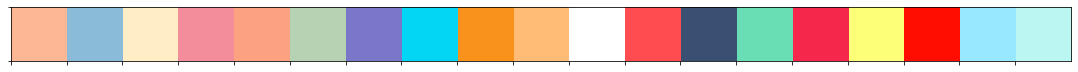

In [0]:
pallette = get_color_pallette(N=aggregate_df.shape[0], SEED=42)
sns.palplot(pallette)

In [0]:
color_map = {fi:pallette[idx] for idx, fi in enumerate(aggregate_df["Frame Instance"].unique(), 0)}
color_map

{'1 CORRELATION sentences': '#7b77c8',
 '10 OCCUPY RANK VIA ORDINAL NUMBERS sentences': '#ffbc77',
 '105 VOTE sentences': '#bbf6f3',
 '108 CREATING sentences': '#02d6f4',
 '124 COMPARING TWO ENTITIES sentences': '#fca280',
 '159 CONDITIONAL OCCURRENCE sentences': '#b7d2b2',
 '204 TAKING SIDES sentences': '#feff78',
 '206 CAPABILITY sentences': '#feb794',
 '219 RATIO sentences': '#ff4c50',
 '230 OCCUPY RANK VIA SUPERLATIVES sentences': '#ffffff',
 '25 RECURRING ACTION sentences': '#69deb5',
 '285 CAUSE CHANGE OF POSITION ON A SCALE sentences': '#ffeec5',
 '29 COMPARING AT TWO DIFFERENT POINTS IN TIME sentences': '#f38d9b',
 '34 OCCUPY RANK sentences': '#f9921b',
 '34 UNIQUENESS OF TRAIT sentences': '#98e8ff',
 '36 RECURRENT ACTION IN FREQUENCY sentences': '#3a5072',
 '4 TAKING SIDES CONSISTENCY sentences': '#ff0d00',
 '445 CAUSATION sentences': '#8abcd9',
 '699 STATEMENT sentences': '#f5284c'}

In [0]:
import plotly.express as px
fig = px.bar(aggregate_df, x='Frame Instance', y='sum', color="Frame Instance", color_discrete_map=color_map)

fig.update_layout(showlegend=False,
                  title="Distribution of Annotated Sentences by Frame Instance over Corpus",
                  xaxis_title = "Frame Instance",
                  yaxis_title="No. of Annotated Sentences",
                  width=1400,
                  height=600)
fig.show()

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=aggregate_df["Frame Instance"],
                             values=aggregate_df["sum"],
                             marker={"colors":list(color_map.values())},
                             title="")])
fig.update_layout(width=1200,
                  height=600)
#fig = px.pie(aggregate_df, names='Frame Instance', values='sum', color="Frame Instance", color_discrete_map=color_map, title="Distribution of Annotated Sentences by Frame Instance over Corpus")
fig.show()

In [0]:
df

Frame Instance Lexical Unit  Count Original Lexical Unit
0                       STATEMENT        Other      3         acknowledge.v
1                       STATEMENT        Other      6          allegation.n
2                       STATEMENT        Other      4              allege.v
3                       STATEMENT        Other     19            announce.v
4                       STATEMENT        Other      4        announcement.n
..                            ...          ...    ...                   ...
119  OCCUPY RANK VIA SUPERLATIVES     most.adv     53              most.adv
120  OCCUPY RANK VIA SUPERLATIVES        Other      2             richest.a
121  OCCUPY RANK VIA SUPERLATIVES        Other      7              safest.a
122  OCCUPY RANK VIA SUPERLATIVES        Other      1            smallest.a
123  OCCUPY RANK VIA SUPERLATIVES        Other     17               worst.a

[124 rows x 4 columns]

Let's try a sunburst chart!

In [0]:
fig = px.sunburst(df, path=['Frame Instance', 'Lexical Unit'], values='Count', width=800, height=600)
fig.show()

Let's do one for the "Other" category!

In [0]:
pallette = get_color_pallette(N=len(df[df["Lexical Unit"] == "Other"]["Original Lexical Unit"].value_counts().to_dict()), SEED=31)
fig = px.sunburst(df[df["Lexical Unit"] == "Other"], path=['Lexical Unit', 'Original Lexical Unit'], values='Count', width=1200, height=1200, color="Original Lexical Unit", color_discrete_sequence=pallette)
fig.show()

What about consolidating the singleton categories?

In [0]:
nonsingleton = df[df["Lexical Unit"] == "Other"].copy()
nonsingleton["CountStr"] = nonsingleton["Count"].apply(str)
nonsingleton.loc[nonsingleton["CountStr"] == "1", "Original Lexical Unit"] = "Singletons"
pallette = get_color_pallette(N=len(nonsingleton["Original Lexical Unit"].value_counts().to_dict()), SEED=31)
fig = px.sunburst(nonsingleton, path=['Lexical Unit', 'CountStr', 'Original Lexical Unit'], values='Count', width=1200, height=1200, color="Original Lexical Unit", color_discrete_sequence=pallette)
fig.show()

In [0]:
nonsingleton

Frame Instance Lexical Unit  ...  Original Lexical Unit CountStr
0                       STATEMENT        Other  ...          acknowledge.v        3
1                       STATEMENT        Other  ...           allegation.n        6
2                       STATEMENT        Other  ...               allege.v        4
3                       STATEMENT        Other  ...             announce.v       19
4                       STATEMENT        Other  ...         announcement.n        4
..                            ...          ...  ...                    ...      ...
118  OCCUPY RANK VIA SUPERLATIVES        Other  ...              longest.a        4
120  OCCUPY RANK VIA SUPERLATIVES        Other  ...              richest.a        2
121  OCCUPY RANK VIA SUPERLATIVES        Other  ...               safest.a        7
122  OCCUPY RANK VIA SUPERLATIVES        Other  ...             Singletons        1
123  OCCUPY RANK VIA SUPERLATIVES        Other  ...                worst.a       17

[104 rows x 5 columns]